<a href="https://colab.research.google.com/github/Moimschoh/data-analyst/blob/main/plot_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline


# Linear regression

We are going to look at the relationship between age and
minutes played.



In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

## Opening data
In this example we use data downloaded from [FBref](https://fbref.com/en/comps/12/2021-2022/stats/2021-2022-La-Liga-Stats) on players in La Liga.
We just use the age and minutes played columns.
And we only take the first 20 observations, to help visualise the process.




In [ ]:

# Define the file path
file_path = r"C:\Users\49178\Downloads\playerstats.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

   Rk                Player  Nation Pos          Squad   Age    Born  MP  \
0   1            Luis Abram  pe PER  DF        Granada  25.0  1996.0   8   
1   2          Marcos Acuña  ar ARG  DF        Sevilla  29.0  1991.0  31   
2   3  Martin Agirregabiria  es ESP  DF         Alavés  25.0  1996.0  24   
3   4    Julen Agirrezabala  es ESP  GK  Athletic Club  20.0  2000.0   4   
4   5         Sergio Agüero  ar ARG  FW      Barcelona  33.0  1988.0   4   

   Starts   Min  ...  npxG   xA  npxG+xA  xG.1  xA.1  xG+xA  npxG.1  \
0       6   560  ...   0.5  0.0      0.5  0.08  0.00   0.08    0.08   
1      26  2260  ...   1.4  3.0      4.4  0.06  0.12   0.18    0.06   
2      17  1616  ...   0.2  1.0      1.2  0.01  0.05   0.07    0.01   
3       4   360  ...   0.0  0.0      0.0  0.00  0.00   0.00    0.00   
4       2   151  ...   1.1  0.3      1.3  0.64  0.16   0.80    0.64   

   npxG+xA.1  Matches     -9999  
0       0.08  Matches  1f462f95  
1       0.18  Matches  81442ecb  
2       0.07  

In [ ]:
num_obs=20
# Define the file path
file_path = r"C:\Users\49178\Downloads\playerstats.csv"

# Read the CSV file into a DataFrame
laliga_df = pd.read_csv(file_path,delimiter=',')

# laliga_df=pd.read_csv("playerstats.csv",delimiter=',')
minutes_model = pd.DataFrame()
minutes_model = minutes_model.assign(minutes=laliga_df['Min'][0:num_obs])
minutes_model = minutes_model.assign(age=laliga_df['Age'][0:num_obs])

# Make an age squared column so we can fir polynomial model.
minutes_model = minutes_model.assign(age_squared=np.power(laliga_df['Age'][0:num_obs],2))

## Plotting the data
Start by plotting the data.



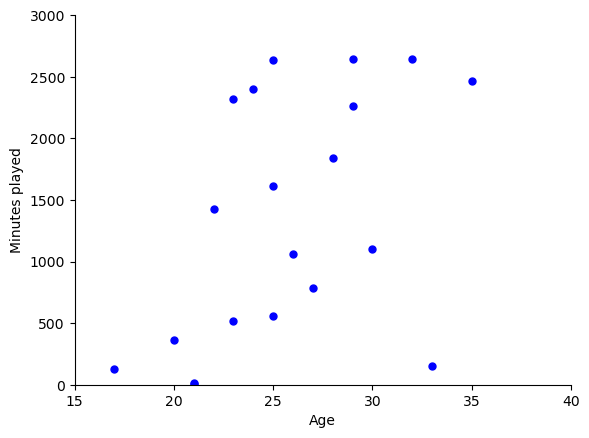

In [ ]:
fig,ax=plt.subplots(num=1)
ax.plot(minutes_model['age'], minutes_model['minutes'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))
plt.show()

## Fitting the model
We are going to begin by doing a  straight line linear regression
 .. math::

    y = b_0 + b_1 x

A straight line relationship between minutes played and age.



In [ ]:
model_fit=smf.ols(formula='minutes  ~ age   ', data=minutes_model).fit()
print(model_fit.summary())
b=model_fit.params

                            OLS Regression Results                            
Dep. Variable:                minutes   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     5.415
Date:                Wed, 21 Aug 2024   Prob (F-statistic):             0.0318
Time:                        12:11:34   Log-Likelihood:                -163.24
No. Observations:                  20   AIC:                             330.5
Df Residuals:                      18   BIC:                             332.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1293.0147   1152.158     -1.122      0.2

Comparing the fit
 ----------------------------
We now use the fit to plot a line through the data.
 .. math::

    y = b_0 + b_1 x

where the parameters are estimated from the model fit.



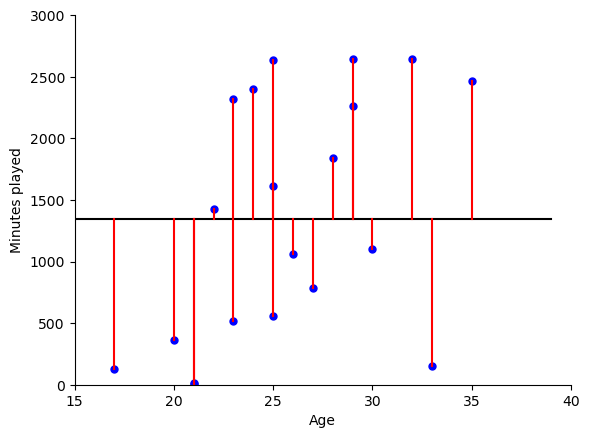

In [ ]:
#First plot the data as previously
fig,ax=plt.subplots(num=1)
ax.plot(minutes_model['age'], minutes_model['minutes'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))

#Now create the line through the data
x=np.arange(40,step=1)
y= np.mean(minutes_model['minutes'])*np.ones(40)
ax.plot(x, y, color='black')

#Show distances to line for each point
for i,a in enumerate(minutes_model['age']):
    ax.plot([a,a],[minutes_model['minutes'][i], np.mean(minutes_model['minutes']) ], color='red')
plt.show()

A model including squared terms
 ----------------------------
We now fit the quadratic model
 .. math::

    y = b_0 + b_1 x + b_2 x^2

estimating the parameters from the data.



                            OLS Regression Results                            
Dep. Variable:                minutes   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     3.559
Date:                Wed, 21 Aug 2024   Prob (F-statistic):             0.0512
Time:                        12:11:37   Log-Likelihood:                -162.38
No. Observations:                  20   AIC:                             330.8
Df Residuals:                      17   BIC:                             333.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8063.5823   5573.188     -1.447      

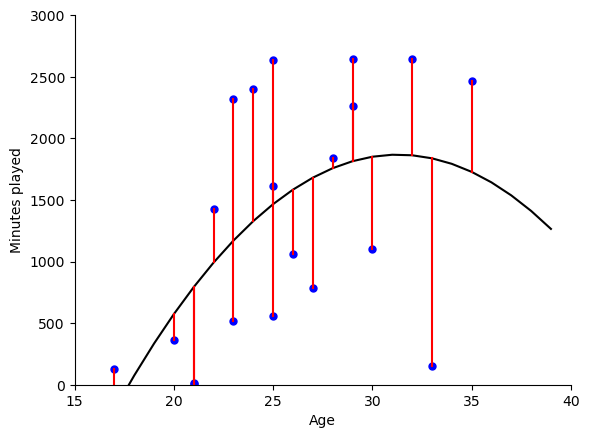

In [ ]:
# First fit the model
model_fit=smf.ols(formula='minutes  ~ age + age_squared  ', data=minutes_model).fit()
print(model_fit.summary())
b=model_fit.params

# Compare the fit
fig,ax=plt.subplots(num=1)
ax.plot(minutes_model['age'], minutes_model['minutes'], linestyle='none', marker= '.', markersize= 10, color='blue')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlim((15,40))
plt.ylim((0,3000))
x=np.arange(40,step=1)
y= b[0] + b[1]*x + b[2]*x*x
ax.plot(x, y, color='black')

for i,a in enumerate(minutes_model['age']):
    ax.plot([a,a],[minutes_model['minutes'][i], b[0] + b[1]*a + b[2]*a*a], color='red')
plt.show()

## References
You can find detailed documentation and resources on soccer analytics at the following link:
[Soccermatics Documentation](https://soccermatics.readthedocs.io/en/latest/index.html)